<a href="https://colab.research.google.com/github/Filquichante/Machine-learning-projects/blob/main/02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Des p'tits tests par ci par là

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch

In [ ]:
sample_size = 1000

X_np, y_np = make_circles(sample_size, noise=0.05, random_state=10)
print(f"{X_np[:10]}\n{y_np[:10]}")

[[-0.29619025 -0.65322487]
 [ 0.637541   -0.40007744]
 [ 0.74725429  0.42294121]
 [-0.52861658  0.80370707]
 [-0.82355015 -0.1790063 ]
 [ 0.73534821 -0.45633223]
 [ 0.03681005  1.04833419]
 [-0.95197861  0.19359381]
 [ 1.01087681  0.26188063]
 [ 0.07339479  1.02066696]]
[1 1 1 0 1 1 0 0 0 0]


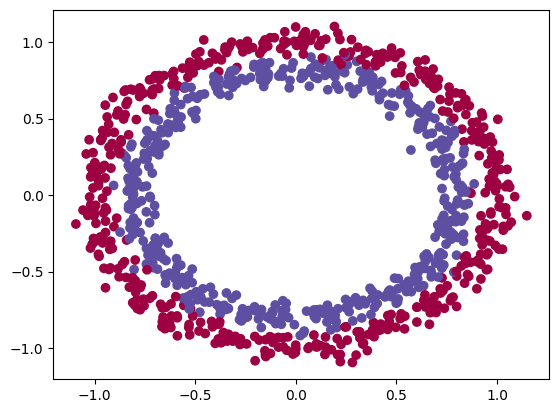

In [ ]:

plt.figure(1)
plt.scatter(x=X_np[:,0],
            y=X_np[:,1],
            c=y_np,
            cmap="Spectral")

In [ ]:
X = torch.from_numpy(X_np).type(torch.float)
y = torch.from_numpy(y_np).type(torch.float)
y[:10]

tensor([1., 1., 1., 0., 1., 1., 0., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import train_test_split
from torch import nn

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train[:10]

tensor([[ 0.3199,  0.8091],
        [ 0.7421, -0.2524],
        [ 0.6458,  0.7558],
        [-0.4967,  0.5526],
        [ 0.5065, -0.6118],
        [-0.7761,  0.7002],
        [ 0.6959,  0.2078],
        [ 0.8624,  0.5833],
        [-0.0138,  0.8638],
        [-0.4776,  0.9358]])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x))

In [ ]:
model = Model()

for i in range(len(X_train[:10])):
  print(model(X_train[i]), y_train[i])

tensor([0.4307], grad_fn=<AddBackward0>) tensor(1.)
tensor([0.2433], grad_fn=<AddBackward0>) tensor(1.)
tensor([0.3807], grad_fn=<AddBackward0>) tensor(0.)
tensor([0.5077], grad_fn=<AddBackward0>) tensor(1.)
tensor([0.2302], grad_fn=<AddBackward0>) tensor(1.)
tensor([0.5632], grad_fn=<AddBackward0>) tensor(0.)
tensor([0.3063], grad_fn=<AddBackward0>) tensor(1.)
tensor([0.3306], grad_fn=<AddBackward0>) tensor(0.)
tensor([0.4819], grad_fn=<AddBackward0>) tensor(1.)
tensor([0.5525], grad_fn=<AddBackward0>) tensor(0.)


###On peut relancer le Notebook à partir d'ici : voici un moyen plus rentable de faire un réseau de neurones avec peu de code
=>

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from torch import nn


sample_size = 1000

X_np, y_np = make_circles(sample_size, noise=0.05, random_state=10)
X = torch.from_numpy(X_np).type(torch.float)
y = torch.from_numpy(y_np).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

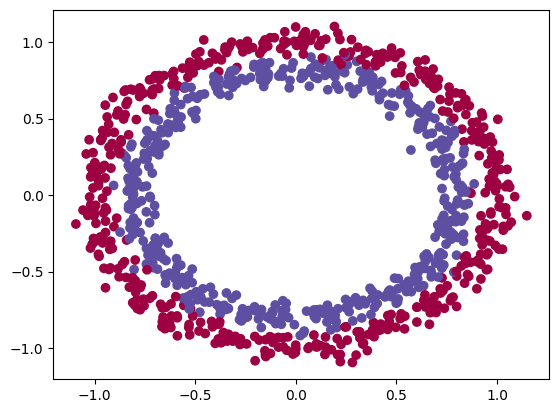

In [ ]:
plt.scatter(x=X_np[:,0],
            y=X_np[:,1],
            c=y_np,
            cmap="Spectral")

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

On ajoute une fonction qui return le "taux de réussite"

In [ ]:
y_preds = model(X_test)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

accuracy_fn(y_test, y_preds)

0.0

#Go faire une boucle d'entrainement !

In [ ]:
epochs = 100
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.95)

1) Do the forward pass
2) Calculate the loss
3) Optimizer zero grad
4) Loss backward (backpropagation)
5) Optimizer step, step, step

In [ ]:
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model(X_test[:5]))).squeeze()

print(torch.eq(y_pred_labels, y_test[:5]))
y_test[:5]

tensor([ True,  True, False,  True,  True])


tensor([0., 0., 1., 0., 0.])

In [ ]:
epochs = 1000
torch.manual_seed(12)

def loop(model, epochs, loss_fn, optimizer):
  for epoch in range(epochs):
    ### Train
    model.train()

    ## 1. Do the forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    ## 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred = y_pred)

    ## 3. Optimizer zero grad
    optimizer.zero_grad()

    ## 4. Loss backward
    loss.backward()

    ## 5. Optimizer step, step, step...
    optimizer.step()



    ### Test
    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    if epoch%(epochs/10) == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Train accuracy: {acc}% | Test loss: {test_loss} | Test accuracy: {test_acc}%")


In [ ]:
loop(model, epochs, loss_fn, optimizer)

Epoch: 0 | Train loss: 0.69908 | Train accuracy: 50.125% | Test loss: 2.4287264347076416 | Test accuracy: 50.5%
Epoch: 100 | Train loss: 0.69285 | Train accuracy: 51.24999999999999% | Test loss: 0.695294201374054 | Test accuracy: 43.5%
Epoch: 200 | Train loss: 0.69287 | Train accuracy: 52.0% | Test loss: 0.7214312553405762 | Test accuracy: 46.0%
Epoch: 300 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6958956718444824 | Test accuracy: 44.0%
Epoch: 400 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959379315376282 | Test accuracy: 44.0%
Epoch: 500 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378719329834 | Test accuracy: 44.0%
Epoch: 600 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378719329834 | Test accuracy: 44.0%
Epoch: 700 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378719329834 | Test accuracy: 44.0%
Epoch: 800 | Train loss: 0.

Ici je vais utiliser une fonction déjà créée

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Ur file already exists")

else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


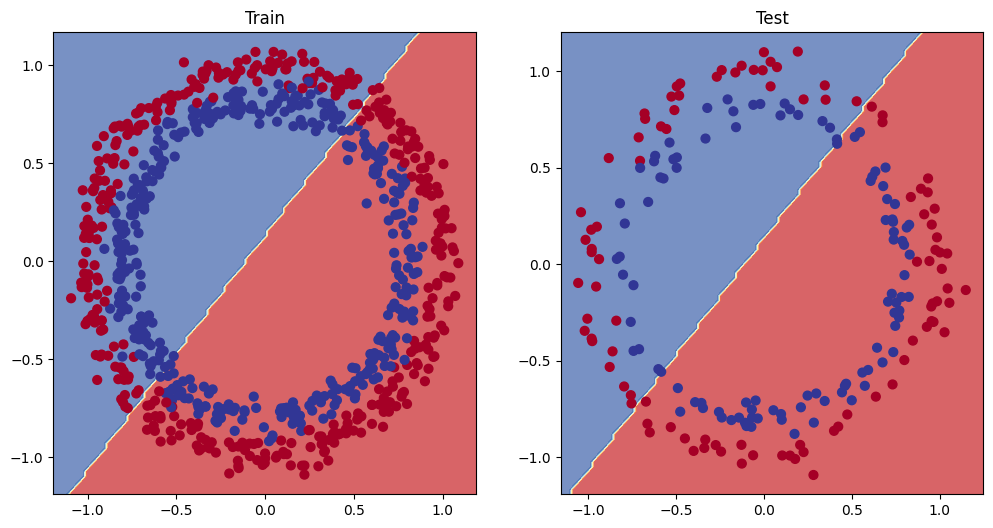

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [ ]:
class DopeModelForCircles(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model_1 = DopeModelForCircles()

In [ ]:
def trainAndEval(MODEL, epochs, loss_fn, optimizer):

  loop(MODEL, epochs, loss_fn, optimizer)


  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title("Train")
  plot_decision_boundary(MODEL, X_train, y_train)
  plt.subplot(1,2,2)
  plt.title("Test")
  plot_decision_boundary(MODEL, X_test, y_test)

Epoch: 0 | Train loss: 0.70647 | Train accuracy: 49.875% | Test loss: 0.7130026817321777 | Test accuracy: 49.5%
Epoch: 100 | Train loss: 0.69283 | Train accuracy: 51.5% | Test loss: 0.6960370540618896 | Test accuracy: 43.0%
Epoch: 200 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959381103515625 | Test accuracy: 44.0%
Epoch: 300 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378719329834 | Test accuracy: 44.0%
Epoch: 400 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378123283386 | Test accuracy: 44.0%
Epoch: 500 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378719329834 | Test accuracy: 44.0%
Epoch: 600 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378719329834 | Test accuracy: 44.0%
Epoch: 700 | Train loss: 0.69283 | Train accuracy: 51.74999999999999% | Test loss: 0.6959378123283386 | Test accuracy: 44.0%
Epoch: 800 | Train loss: 0

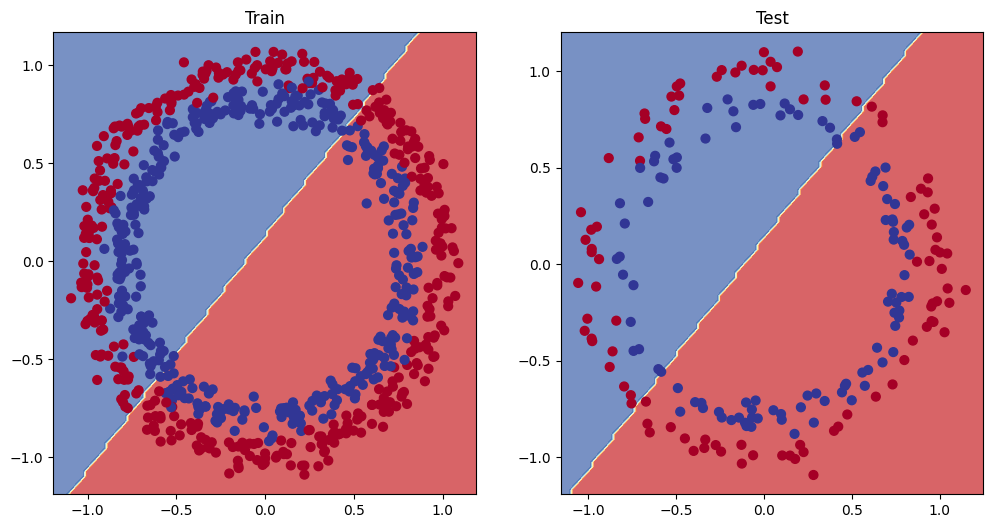

In [ ]:
trainAndEval(model_1, 1000, nn.BCEWithLogitsLoss(), torch.optim.Adam(params=model_1.parameters(), lr=0.1))

In [ ]:
class DopeModelThroughSquares(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x**2)))

In [ ]:
model_2 = DopeModelThroughSquares()

Epoch: 0 | Train loss: 0.69676 | Train accuracy: 49.875% | Test loss: 0.6953521966934204 | Test accuracy: 50.5%
Epoch: 100 | Train loss: 0.64979 | Train accuracy: 69.5% | Test loss: 0.6497953534126282 | Test accuracy: 71.0%
Epoch: 200 | Train loss: 0.50813 | Train accuracy: 94.25% | Test loss: 0.5026833415031433 | Test accuracy: 95.5%
Epoch: 300 | Train loss: 0.21596 | Train accuracy: 97.625% | Test loss: 0.20353130996227264 | Test accuracy: 96.5%
Epoch: 400 | Train loss: 0.11496 | Train accuracy: 97.5% | Test loss: 0.10798119753599167 | Test accuracy: 97.0%
Epoch: 500 | Train loss: 0.08671 | Train accuracy: 97.5% | Test loss: 0.08351588994264603 | Test accuracy: 97.0%
Epoch: 600 | Train loss: 0.07510 | Train accuracy: 97.5% | Test loss: 0.0744786337018013 | Test accuracy: 97.0%
Epoch: 700 | Train loss: 0.06915 | Train accuracy: 97.5% | Test loss: 0.07041330635547638 | Test accuracy: 97.0%
Epoch: 800 | Train loss: 0.06569 | Train accuracy: 97.5% | Test loss: 0.06841039657592773 | Test 

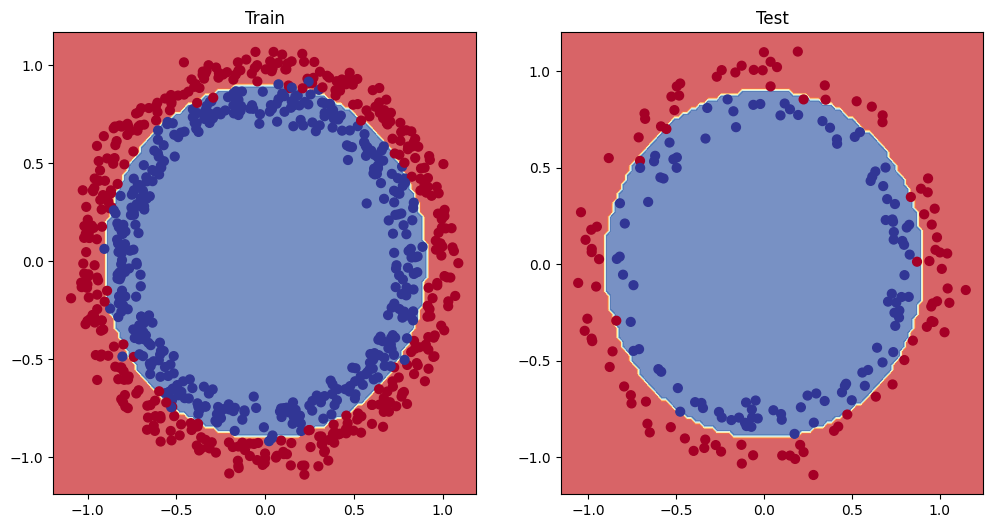

In [ ]:
trainAndEval(model_2, 1000, nn.BCEWithLogitsLoss(), torch.optim.SGD(params=model_2.parameters(), lr=0.1))

In [ ]:
A = torch.arange(-10, 10, 0.1, dtype=torch.float32)
sA = A.size(0)

In [ ]:
def sigmoid(x: torch.Tensor):
  return 1 /(1 + torch.exp(-x))

print(sigmoid(A))

tensor([4.5398e-05, 5.0172e-05, 5.5449e-05, 6.1280e-05, 6.7724e-05, 7.4846e-05,
        8.2717e-05, 9.1416e-05, 1.0103e-04, 1.1165e-04, 1.2339e-04, 1.3637e-04,
        1.5071e-04, 1.6656e-04, 1.8407e-04, 2.0343e-04, 2.2482e-04, 2.4846e-04,
        2.7458e-04, 3.0345e-04, 3.3535e-04, 3.7061e-04, 4.0957e-04, 4.5262e-04,
        5.0020e-04, 5.5278e-04, 6.1088e-04, 6.7508e-04, 7.4603e-04, 8.2442e-04,
        9.1105e-04, 1.0068e-03, 1.1125e-03, 1.2294e-03, 1.3585e-03, 1.5012e-03,
        1.6588e-03, 1.8329e-03, 2.0253e-03, 2.2378e-03, 2.4726e-03, 2.7320e-03,
        3.0184e-03, 3.3348e-03, 3.6842e-03, 4.0701e-03, 4.4963e-03, 4.9668e-03,
        5.4863e-03, 6.0598e-03, 6.6929e-03, 7.3915e-03, 8.1626e-03, 9.0133e-03,
        9.9518e-03, 1.0987e-02, 1.2128e-02, 1.3387e-02, 1.4774e-02, 1.6302e-02,
        1.7986e-02, 1.9840e-02, 2.1881e-02, 2.4127e-02, 2.6597e-02, 2.9312e-02,
        3.2295e-02, 3.5571e-02, 3.9166e-02, 4.3107e-02, 4.7426e-02, 5.2154e-02,
        5.7324e-02, 6.2973e-02, 6.9138e-

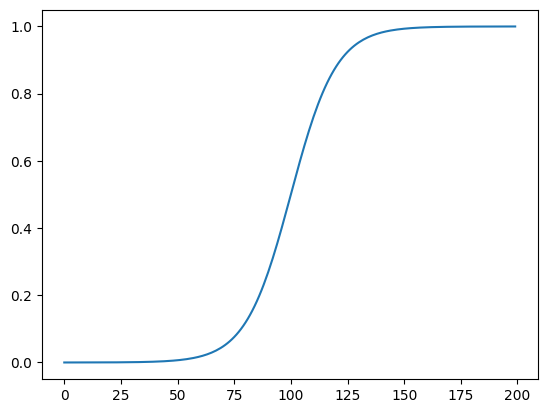

In [ ]:
plt.plot(sigmoid(A))

##On va pouvoir relancer le Notebook à partir d'ici, car c'est maintenant l'heure de la MULTICLASS CLASSIFICATION !!!!


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
NOISE = 1.5



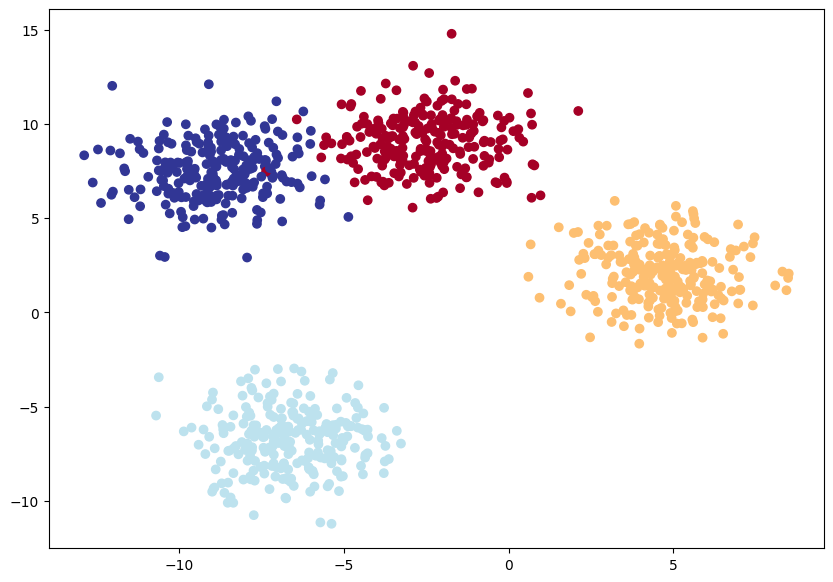

In [ ]:
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            random_state = RANDOM_SEED,
                            cluster_std = NOISE,
                            centers = NUM_CLASSES)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob/4, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()

    self.linear_layers_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x = torch.Tensor):
    return self.linear_layers_stack(x)

In [ ]:
blobModel_0 = BlobModel(input_features = NUM_FEATURES, output_features = NUM_CLASSES).to(device)
blobModel_0

BlobModel(
  (linear_layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
blobModel_0.to(device)
blob_loss_fn = nn.CrossEntropyLoss()
blob_optimizer = torch.optim.SGD(params = blobModel_0.parameters(), lr=0.1)

Training loop for classification model 😏

In [ ]:
# Lil' things to do before the training loop

torch.manual_seed(12)
torch.cuda.manual_seed(12)

y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)

In [ ]:
def blobLoop(model, epochs, loss_fn, optimizer):
  for epoch in range(epochs):

    #Training

    model.train()
    y_blob_logits = model(X_blob_train)
    y_blob_preds = torch.softmax(y_blob_logits, dim=1).argmax(dim=1)
    blob_loss = loss_fn(y_blob_logits, y_blob_train)
    blob_acc = accuracy_fn(y_true = y_blob_train, y_pred = y_blob_preds)
    optimizer.zero_grad()
    blob_loss.backward()
    optimizer.step()


    model.eval()
    with torch.inference_mode():
      blob_test_logits = model(X_blob_test)
      blob_test_preds = torch.softmax(blob_test_logits, dim=1).argmax(dim=1)
      blob_test_loss = loss_fn(blob_test_logits, y_blob_test)
      blob_test_acc = accuracy_fn(y_true = y_blob_test, y_pred = blob_test_preds)

    if epoch%(epochs/10) == 0:
      print(f"Epoch: {epoch} | Train loss: {blob_loss:.5f} | Train accuracy: {blob_acc}% | Test loss: {blob_test_loss} | Test accuracy: {blob_test_acc}%")

In [ ]:
blobLoop(blobModel_0, 100, blob_loss_fn, blob_optimizer)

Epoch: 0 | Train loss: 1.32718 | Train accuracy: 25.124999999999996% | Test loss: 0.9618034362792969 | Test accuracy: 55.00000000000001%
Epoch: 10 | Train loss: 0.58701 | Train accuracy: 89.875% | Test loss: 0.5050390362739563 | Test accuracy: 93.0%
Epoch: 20 | Train loss: 0.31873 | Train accuracy: 97.75% | Test loss: 0.2684808671474457 | Test accuracy: 99.5%
Epoch: 30 | Train loss: 0.14354 | Train accuracy: 99.0% | Test loss: 0.12461598217487335 | Test accuracy: 99.0%
Epoch: 40 | Train loss: 0.08402 | Train accuracy: 99.25% | Test loss: 0.07393592596054077 | Test accuracy: 99.0%
Epoch: 50 | Train loss: 0.06071 | Train accuracy: 99.25% | Test loss: 0.052608706057071686 | Test accuracy: 99.5%
Epoch: 60 | Train loss: 0.04906 | Train accuracy: 99.25% | Test loss: 0.04138291999697685 | Test accuracy: 99.5%
Epoch: 70 | Train loss: 0.04228 | Train accuracy: 99.25% | Test loss: 0.03462715074419975 | Test accuracy: 99.5%
Epoch: 80 | Train loss: 0.03792 | Train accuracy: 99.25% | Test loss: 0.0

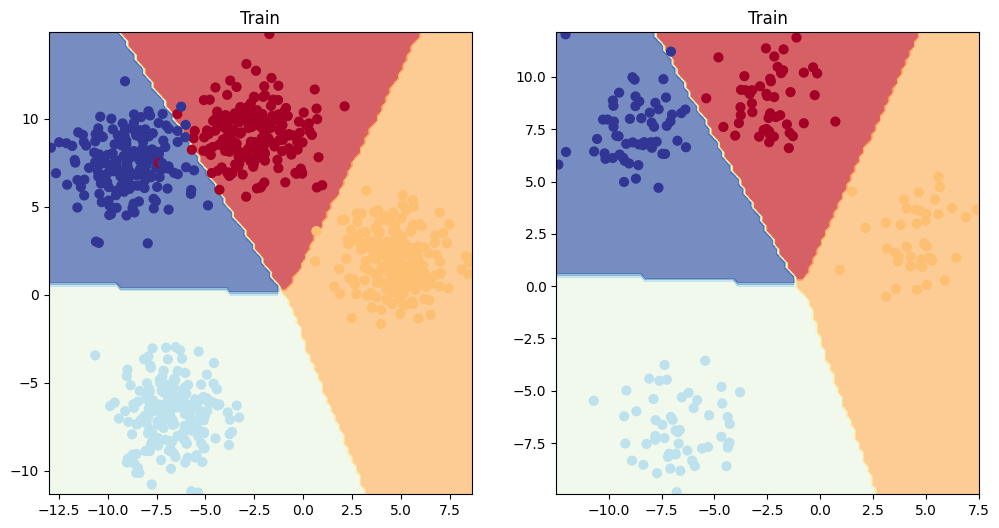

In [ ]:
###Plotting everything
plt.figure(figsize = (12,6))

#Train
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(blobModel_0, X_blob_train, y_blob_train)

# Test
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(blobModel_0, X_blob_test, y_blob_test)